In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ananthu017/emotion-detection-fer")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\BineshMahato\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1


Loaded model from disk
Found 7178 images belonging to 7 classes.
113/113 [==============================] - 7s 56ms/step
-----------------------------------------------------------------
[[114  10 137 269 154 179  95]
 [ 12   1  15  30  25  20   8]
 [ 99  16 122 256 208 189 134]
 [183  22 223 464 297 357 228]
 [145  10 174 317 212 241 134]
 [147  18 151 322 238 232 139]
 [ 82   8 101 233 153 157  97]]


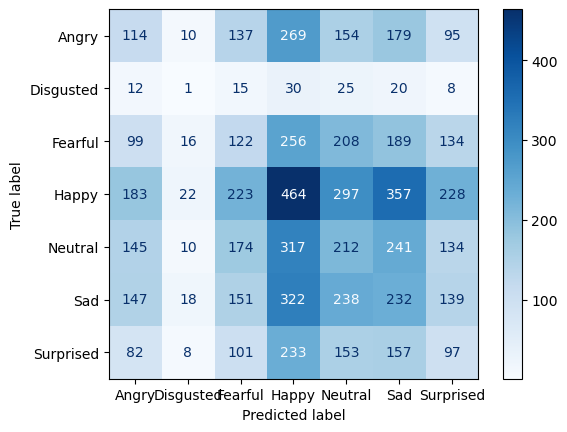

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.15      0.12      0.13       958
           1       0.01      0.01      0.01       111
           2       0.13      0.12      0.13      1024
           3       0.25      0.26      0.25      1774
           4       0.16      0.17      0.17      1233
           5       0.17      0.19      0.18      1247
           6       0.12      0.12      0.12       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



In [5]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Path to the test directory
path = r'C:\Users\BineshMahato\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1\test'

# Emotion labels
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Load the model structure (JSON file)
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# Load weights into the model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
    path,  # Correct path variable
    target_size=(48, 48),  # Target size for images
    batch_size=64,  # Batch size for processing
    color_mode="grayscale",  # Use grayscale images
    class_mode='categorical'  # Classification mode
)

# Do predictions on test data
predictions = emotion_model.predict(test_generator, verbose=1)

# Print the results (optional)
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")

# Confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict.values())
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))


In [4]:

# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Path to the test directory
path = r'C:\Users\BineshMahato\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1\train'


# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        path,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        path,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

# save model structure in jason file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')



Found 28709 images belonging to 7 classes.
Found 28709 images belonging to 7 classes.
Epoch 1/50
448/448 [==============================] - 93s 206ms/step - loss: 1.8015 - accuracy: 0.2595 - val_loss: 1.7094 - val_accuracy: 0.3188
Epoch 2/50
448/448 [==============================] - 92s 205ms/step - loss: 1.6314 - accuracy: 0.3641 - val_loss: 1.5465 - val_accuracy: 0.4138
Epoch 3/50
448/448 [==============================] - 93s 207ms/step - loss: 1.5247 - accuracy: 0.4141 - val_loss: 1.4539 - val_accuracy: 0.4374
Epoch 4/50
448/448 [==============================] - 93s 207ms/step - loss: 1.4504 - accuracy: 0.4447 - val_loss: 1.3765 - val_accuracy: 0.4778
Epoch 5/50
448/448 [==============================] - 103s 229ms/step - loss: 1.3911 - accuracy: 0.4708 - val_loss: 1.3122 - val_accuracy: 0.5089
Epoch 6/50
448/448 [==============================] - 99s 222ms/step - loss: 1.3385 - accuracy: 0.4941 - val_loss: 1.2628 - val_accuracy: 0.5204
Epoch 7/50
448/448 [=======================

In [6]:
import cv2
import numpy as np
from keras.models import model_from_json


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

# start the webcam feed
cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# pass here your video path
# you may download one from here : https://www.pexels.com/video/three-girls-laughing-5273028/
# cap = cv2.VideoCapture("C:\\JustDoIt\\ML\\Sample_videos\\emotion_sample6.mp4")

try:
    while True:
        # Find haar cascade to draw bounding box around face
        ret, frame = cap.read()
        frame = cv2.resize(frame, (1280, 720))
        if not ret:
            break

        face_detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

        if face_detector.empty():
            print("Error loading cascade classifier")
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # detect faces available on camera
        num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

        # take each face available on the camera and Preprocess it
        for (x, y, w, h) in num_faces:
            cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
            roi_gray_frame = gray_frame[y:y + h, x:x + w]
            cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

            # predict the emotions
            emotion_prediction = emotion_model.predict(cropped_img)
            maxindex = int(np.argmax(emotion_prediction))
            cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

        cv2.imshow('Emotion Detection', frame)

        # Press 'q' to quit the program
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    print("Program interrupted.")

finally:
    # Release the video capture object and close all windows
    cap.release()
    cv2.destroyAllWindows()
    print("Resources released.")


Loaded model from disk
1/1 [==============================] - 0s 40ms/step
Program interrupted.
Resources released.
